In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from difflib import SequenceMatcher

### Define path to data

In [228]:
base_path = "data/raw"

In [32]:
property_dict = {
    "A": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "R": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "N": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "D": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "C": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "Q": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "E": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "G": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "H": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "I": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "L": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "K": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "M": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "F": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "P": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "S": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "T": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "W": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "Y": ["Polar", 'Neutral', 'Hydrophobic', "Aromatic", 'Ionizable'],
    "V": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable']
}

### Transform property dictionary

In [33]:
mapping = {'Hydrophobic':0, 'Hydrophilic':1, 'Neutral':0, 'Positive':1, 'Negative':-1, 'Polar':1, 'NonPolar':0, 'Aromatic':1, 'NonAromatic':0, 'Ionizable':1, 'NonIonizable':0}


In [35]:
prop_arr = np.asarray([v for v in property_dict.values()])
# for i in range(len(prop_arr[:,0]

In [36]:
feature_dict = {}
for key in property_dict.keys():
    vals = [mapping[p] for p in property_dict[key]]
    feature_dict[key.lower()] = vals

In [37]:
feature_dict

{'a': [0, 0, 0, 0, 0],
 'r': [1, 1, 1, 0, 1],
 'n': [1, 0, 1, 0, 0],
 'd': [1, -1, 1, 0, 1],
 'c': [1, 0, 1, 0, 1],
 'q': [1, 0, 1, 0, 0],
 'e': [1, -1, 1, 0, 1],
 'g': [0, 0, 0, 0, 0],
 'h': [1, 1, 1, 0, 1],
 'i': [0, 0, 0, 0, 0],
 'l': [0, 0, 0, 0, 0],
 'k': [1, 1, 1, 0, 1],
 'm': [0, 0, 0, 0, 0],
 'f': [0, 0, 0, 1, 0],
 'p': [0, 0, 0, 0, 0],
 's': [1, 0, 1, 0, 0],
 't': [1, 0, 1, 0, 0],
 'w': [0, 0, 0, 1, 0],
 'y': [1, 0, 0, 1, 1],
 'v': [0, 0, 0, 0, 0]}

## Notes

The RF was trained in a 5-fold cross-validation manner training on 4 of the 5 partitions using the epitope residues (positive dataset) and a subset of randomly selected non-epitope residues (negative dataset)

Each amino acid was encoded using the volume (5), hydrophobicity (6) and polarity (7) combined with the relative surface accessibility (RSA) and secondary structure (SS) predicted using NetsurfP (8).

Possible feature: Sum of volumes of residues (equation 1 in supple)

### Load epitope data of SARS

In [38]:
data = pd.read_csv(os.path.join(base_path, "epitope_table_export_1582825906.csv"))

In [39]:
epitopes_sars = data["Epitope.2"][1:]

In [40]:
for epi in epitopes_sars:
    print(epi)

AALVSGTATAGWTFGAG
AATKMSECVLGQSKRVD
AATVLQLPQGTTLPK
AAYFVGYLKPTTFMLKY
AGCLIGAEHVDTSYECD
AIPTNFSISITTEVMPV
AISSVLNDILSRLDKVE
ALALLLLDRLNQLESKV
ALNCYW
ALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFEL + ACET(A1)
AMDPIYDEPTTTTSVPL
AMQMAYRF
ANKEGIVWVATEGALN
APRITFGGPTDSTDNNQN
AQKFNGLTVLPPLLTDD
ASSRSSSRSRGNSRNST
ASWFTALTQHGKEELRFPRGQ
ATEKSNVVRGWV
AYFPREGVFVFNGTSWF
AYSNNTIAIPTNFSISI
CANLLLQYGSFCTQLNRALSGIA
CASYHTVSLLRSTSQKS
CDIPIGAGICASYHTVS
CGPKLSTDLIKNQCVNF
CGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFG
CGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTD
CKFDEDDSEPVLKGVKLHYT
CSQNPLAELKCSVKSFE
CSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGD
CTDVSTAIHADQLTPAW
CTDVSTAIHADQLTPAWRIYSTGNNVFQTQAG
CTPPALNCYWPLNDYGF
CTTFDDVQAPNYTQHTSSMRGVYYPDEIFR
CVLAWNTRNIDATSTGN
CYGVSATKLNDLCFSNV
CYWPLNDYGFYTTTGIG
DDKDPQFKDNVILLNKHIDA
DDSEPVLKGVKLHYT
DFCGKGYHLMSFPQAAP
DFSRQLQNSMSGASA
DGIYFAATEKSNVVRGW
DLGDISGINASVVNIQK
DLPSGFNTLKPIFKLPL
DMIAAYTAALVSGTATA
DNIKDC
DRCTTFDDVQAPNYTQH
DRLNQLESKVSGKGQQQQ
DVNLHSSR
DVSEKSGNFKHLREFVF
DVVNQNAQALNTLVKQL
EAE

In [41]:
print("mean epitope length:", np.mean([len(epi) for epi in epitopes_sars])) # , return_counts=True)

mean epitope length: 17.42


### Load structural data of paper

In [230]:
with open(os.path.join(base_path, "pdb_chains.fasta"), "r") as infile:
    txt = infile.read()
structured = txt.split(">")[1:]

In [231]:
non_unique = []
for entry in structured:
    split_entry = entry.split("\n")
    non_unique.append(split_entry[1])

In [233]:
len(non_unique)

776

In [242]:
sequ_vals[0], sequ_vals[5]

('kvfgrcelaaamkrhglaNyrGYSlgNwvcaakfesnfntqatnrntdgstdygilqinsrwwcndgrtpgsrnlcnipcsallssditasvncakkivsdGNgmnawvawrnrcKGTDVQawIRgcrl',
 'kvfgrcelaaamkrhgldnyrgyslgnwvcaakfesnfnsQaTNRNtDgstdYgvlqinsrwwcndGKTPgsrnlcnipcSalLssditatvncakkivsdgngmnawvawrnrckgtdvqawirgcrl')

In [247]:
len(unique_data)

259

In [ ]:
similarity_threshold = 0.7

unique_data = []
similarities = []
for i, sequ1 in enumerate(non_unique):
    found_similar = 0
    sims = []
    for sequ2 in non_unique[i+1:]:
        s = SequenceMatcher(None, sequ1, sequ2)
        sims.append(s.ratio())
        if s.ratio()> similarity_threshold:
            found_similar = 1
    similarities.append(sims)
    print(found_similar)
    if not found_similar:
        unique_data.append(i)

In [249]:
struct_metadata = list()
struct_sequ = list()
struct_lab_arr = list()
for i in unique_data: # range(len(structured)):
    split_entry = structured[i].split("\n")
    struct_metadata.append(split_entry[0])
    struct_sequ.append(split_entry[1])
    labels = [int(s.isupper()) for s in split_entry[1]]
    struct_lab_arr.append(labels)
struct_lab_arr = np.array(struct_lab_arr)

In [250]:
# TESTING
print(struct_sequ[20])
print(struct_lab_arr[20])

sldeknsVsvDLPgemkvlVSKEKnkdgkYdliatvdklelkgtsdKNNgsgvlegvkadkckvkltisDDLGqttlevfkedgktlvskkvtsKDKssteekfnekgevsekiitradgtrleytgiksdgsgkakevlkgyvlegtltaekttlvvkegtvtlsknisksgevsvelndtdSSAAtKkTAAwnsgtstltiTvNSKktkdlvftkentitvqqyDSNGTklegsaveitkldeiknalk
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [251]:
print("number amino acids", len("".join(struct_sequ)), "number sequences", len(struct_lab_arr))

number amino acids 61426 number sequences 259


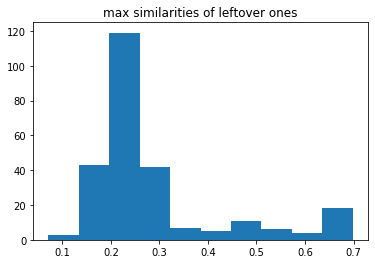

In [259]:
plt.hist([max(similarities[i]) for i in unique_data[:-1]])
plt.title("max similarities of leftover ones")
plt.show()

### Load linear data of paper

In [47]:
with open(os.path.join(base_path, "iedb_linear_epitopes.fasta.txt"), "r") as infile:
    txt_linear = infile.read()

In [48]:
linear = txt_linear.split(">")[1:]

In [49]:
linear_metadata = list()
linear_sequ = list()
linear_epi = list()
linear_labs = list()
for entry in linear:
    split_entry = entry.split("\n")
    if split_entry[0][:3]=="Pos":
        linear_labs.append(1)
    elif split_entry[0][:3]=="Neg":
        linear_labs.append(0)
    linear_metadata.append(split_entry[0][9:])
    linear_sequ.append(split_entry[1])
    linear_epi.append("".join([s for s in split_entry[1] if s.isupper()]))

In [50]:
# TESTING
test_int = 50
print(linear[test_int])
print(linear_sequ[test_int])
print(linear_epi[test_int])
print(linear_labs[test_int])

PositiveID_46198
msdngpqsnqrsapritfggptdstdnnqnggrngarpkqrrpqglpnntaswftaltqhgkeelrfprgqgvpiNTNSGPDDQIGYYRRATRrvrggdgkmkelsprwyfyylgtgpeaslpygankegivwvategalntpkdhigtrnpnnnaatvlqlpqgttlpkgfyaegsrggsqassrsssrsrgnsrnstpgssrgnsparmasgggetalalllldrlnqleskvsgkgqqqqgqtvtkksaaeaskkprqkrtatkqynvtqafgrrgpeqtqgnfgdqdlirqgtdykhwpqiaqfapsasaffgmsrigmevtpsgtwltyhgaiklddkdpqfkdnvillnkhidayktfpptepkkdkkkktdeaqplpqrqkkqptvtllpaadmddfsrqlqnsmsgasadstqa

msdngpqsnqrsapritfggptdstdnnqnggrngarpkqrrpqglpnntaswftaltqhgkeelrfprgqgvpiNTNSGPDDQIGYYRRATRrvrggdgkmkelsprwyfyylgtgpeaslpygankegivwvategalntpkdhigtrnpnnnaatvlqlpqgttlpkgfyaegsrggsqassrsssrsrgnsrnstpgssrgnsparmasgggetalalllldrlnqleskvsgkgqqqqgqtvtkksaaeaskkprqkrtatkqynvtqafgrrgpeqtqgnfgdqdlirqgtdykhwpqiaqfapsasaffgmsrigmevtpsgtwltyhgaiklddkdpqfkdnvillnkhidayktfpptepkkdkkkktdeaqplpqrqkkqptvtllpaadmddfsrqlqnsmsgasadstqa
NTNSGPDDQIGYYRRATR
1


In [51]:
print("class balance", np.unique(linear_labs, return_counts=True))

class balance (array([0, 1]), array([18722, 11834]))


### Define features

In [260]:
feature_dict["x"] = [0.5 for _ in range(5)]

In [261]:
def pad_seq(seq, pad_len=10):
    return "".join(["x" for _ in range(pad_len)])+seq+"".join(["x" for _ in range(pad_len)])

In [262]:
def seq2features(seq, window_r=4):
    seq_padded = pad_seq(seq, pad_len=window_r)
    feats = np.array([feature_dict[s.lower()] for s in seq_padded])
    window_feats = np.array([feats[i-window_r:i+window_r+1] for i in range(window_r, len(seq)+window_r)])
    return window_feats

In [263]:
seq2features(linear_epi[20]).shape

(11, 9, 5)

In [264]:
print(linear_epi[20])
print(seq2features(linear_epi[20]))

TNGTSGRTPVL
[[[0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]]

 [[0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]]

 [[0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  1.  1.  0.  1. ]]

 [[0.5 0.5 0.5 0.5 0.5]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  1.  1.  0.  1. ]
  [1.  0.  1.  0.  0. ]]

 [[1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  0. ]
  [1.  0.  1.  0.  0. ]
  [1.  0.  1.  0.  0

In [ ]:
# jede aminosäure 45 features
# 1d convolution auf je 45 features
# spalte: protein-id, position im 

### CNN

In [63]:
from sklearn.model_selection import train_test_split

### Get data from dataframe

In [172]:
# Not relevant right now --> would lead to overlapping train and test
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [272]:
# first select train and test samples
inds = np.random.permutation(len(np.unique(df["our_id"])))
train_size = 0.7
test_size = 0.2
val_size = 0.1
train_inds = inds[:int(train_size*len(inds))]
test_inds = inds[int(train_size*len(inds)): int(train_size*len(inds))+int(test_size*len(inds))]
val_inds = inds[int(train_size*len(inds))+int(test_size*len(inds)):]

In [273]:
train_data = df[df['our_id'].isin(train_inds)]
test_data = df[df['our_id'].isin(test_inds)]
val_data = df[df['our_id'].isin(val_inds)]

In [274]:
x_train = np.array([d for d in train_data["data"].values])
y_train = np.array(train_data["labels"])
x_test = np.array([d for d in test_data["data"].values])
y_test = np.array(test_data["labels"])
x_val = np.array([d for d in val_data["data"].values])
y_val = np.array(val_data["labels"])

In [275]:
print(len(train_inds), len(test_inds), len(val_inds))

181 51 27


In [276]:
print("train:", x_train.shape, y_train.shape,"val:", x_val.shape, y_val.shape, "test:", x_test.shape, y_test.shape)

train: (44217, 9, 5) (44217,) val: (6289, 9, 5) (6289,) test: (10920, 9, 5) (10920,)


## Train model

In [332]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [278]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([40702,  3515]))

In [333]:
# define model with class weights for unbalanced
clf = RandomForestRegressor(max_depth=10, random_state=0)
# clf = RandomForestClassifier(max_depth=10, random_state=0, class_weight={0: 1, 1:5})
# clf = SVR()

In [334]:
clf.fit(x_train.reshape(len(x_train), 45), y_train)

# print(clf.feature_importances_)
# print(clf.predict([[0, 0, 0, 0]]))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [335]:
out = clf.predict(x_val.reshape(len(x_val), 45))

In [336]:
def split_bal_acc(gt, pred):
    gt_1 = gt[gt==1]
    pred_1 = pred[gt==1]
    gt_0 = gt[gt==0]
    pred_0 = pred[gt==0]
    print("accuracy for gt 1:", accuracy_score(gt_1, pred_1))
    print("accuracy for gt 0:", accuracy_score(gt_0, pred_0))

In [337]:
# print("accuracy:", accuracy_score(y_val, out), "balanced:", balanced_accuracy_score(y_val, out))
print("roc auc:", roc_auc_score(y_val, out)) # [:,1]))

roc auc: 0.6355542184009078


In [ ]:
split_bal_acc(y_val, out[:,1])

## Prepare dataframe:

In [265]:
df_cols = [[] for _ in range(6)]
for i in range(len(struct_sequ)):
    sequ_len = len(struct_sequ[i])
    # our id column
    df_cols[0].append(np.array([i for _ in range(sequ_len)]))
    # metadata column
    df_cols[1].append(np.array([struct_metadata[i] for _ in range(sequ_len)]))
    # position in this sequence
    df_cols[2].append(np.arange(0,sequ_len, 1))
    # actual amino acid
    df_cols[3].append(list(struct_sequ[i]))
    # actual data
    df_cols[4].append(seq2features(struct_sequ[i], window_r=4))
    # labels
    df_cols[5].append(struct_lab_arr[i])

In [266]:
flattened_df_cols = [np.concatenate(df_cols[i]) for i in range(6)]

In [267]:
names = ["our_id", "metadata", "position", "amino_acid", "data", "labels"]
df = pd.DataFrame()

In [268]:
for i in range(6):
    df[names[i]] = pd.Series(flattened_df_cols[i].tolist())

In [270]:
out_path = "data"

In [271]:
df.to_csv(os.path.join(out_path, "data_struct_features.csv"))

In [162]:
len(df)

183887

In [269]:
df.head(20)

,our_id,metadata,position,amino_acid,data,labels
0,0,1AHW_ED C 4,0,t,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
1,0,1AHW_ED C 4,1,n,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
2,0,1AHW_ED C 4,2,t,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
3,0,1AHW_ED C 4,3,v,"[[0.5, 0.5, 0.5, 0.5, 0.5], [1.0, 0.0, 1.0, 0....",0
4,0,1AHW_ED C 4,4,a,"[[1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0....",0
5,0,1AHW_ED C 4,5,a,"[[1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0....",0
6,0,1AHW_ED C 4,6,y,"[[1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....",0
7,0,1AHW_ED C 4,7,n,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....",0
8,0,1AHW_ED C 4,8,l,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....",0
9,0,1AHW_ED C 4,9,t,"[[0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1....",0


### Random shit

In [62]:
inds = np.random.permutation(len(struct_sequ))
nr_train = len(inds)//5
train = data_struct[inds[:nr_train]]

data_struct = [seq2features(seq) for seq in x_train]
x_inp = np.concatenate(data_struct, axis=0)

y_inp = np.concatenate(y_train, axis=0)
print(x_inp.shape, y_inp.shape)

776

In [211]:
small_df = pd.DataFrame()

In [212]:
small_df["sequ"] = pd.Series(struct_sequ)

In [214]:
new = small_df.drop_duplicates()

In [215]:
len(new)

466

0.6666666666666666

In [224]:
print(len(new_sequ))

337


In [223]:
unique_data = []
sequ_vals = new["sequ"].values
for i, sequ1 in enumerate(sequ_vals):
    found_similar = 0
    for sequ2 in sequ_vals[i+1:]:
        s = SequenceMatcher(None, sequ1, sequ2)
        if s.ratio()> 0.9:
            found_similar = 1
    print(found_similar)
    if not found_similar:
        unique_data.append(sequ1)
        

0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0


In [225]:
new_sequ

['kvfgrcelaaamkrhglaNyrGYSlgNwvcaakfesnfntqatnrntdgstdygilqinsrwwcndgrtpgsrnlcnipcsallssditasvncakkivsdGNgmnawvawrnrcKGTDVQawIRgcrl',
 'tntvaaynltwkstnfktilewepkpvnqvytvqistksgdwkskcfyttdtecdltdeivkdvkqtylarvfsypagneplyenspeftpyletnlgqptiqsfeqvgtkvnvtvedertlvrrnntflslrdvfgKdlIyTlYywkssssgKKTAKTNtnefliDvdkgenycfsvQaViPsRTVnRKstDspvecmg',
 'qdvlgdlpvigkpvnggmnfqpasSPlaHDqqWldhfvlyiitavtifvcllllicivrfnrranpvparfthntpieviwtlvpvlilvaigafslpilfrsqempndpdlvikaighqwywsyeypndgvafdalmlekealadagysedeyllatdnpvvvpVGKkvlvqvtatdvihawtipafavkqdavpgriaqlwfSVDQEgvyfgqcselcginhaympivvkavSQEKyEawlagakeefaa',
 'mrgmlplfepkgrvllvdghhlayrtfhalkglttsrgepvqavygfaksllkalkedgdavivvfdakapsfrheayggykagraptpedfprqlalikelvdllglarlevpgyeaddvlaslakkaekegyevriltadkdlyqllsdrihvlhpegylitpawlwekyglrpdqwadyraltgdesdnlpgvkgigektarklleewgsleallknldrlkpairekilahmddlklswdlakvrtdlplevdfakrrepdrerlraflerlefgsllhefgllespkaleeapwpppegafvgfvlsRKEpmwadllalaaarggrvhrapepykalrdlkearglLakdlsvlalreglglppgddpmllaylldPSnTTpEgvarryggeWteea